# Linear Regression Multiple Ways

## Making the data

We'll first construct a synthetic data set..using a function from the `scikit-learn` library. Synthetic data is nice in the sense that we can constrain how the noise behaves, and thus isolate effects.

In [1]:
%matplotlib inline
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#code adapted from http://tillbergmann.com/blog/python-gradient-descent.html
X, y, coef = make_regression(n_samples = 100, 
                       n_features=1, 
                       noise=20,
                       random_state=2017,
                       coef=True)

Notice that the X is in the canonical array-of-arrays format.
**Try and print its shape**

We are fitting a model with an intercept. Lets see what it is.

In [3]:
coef

array(80.88336208)

We can plot the data.

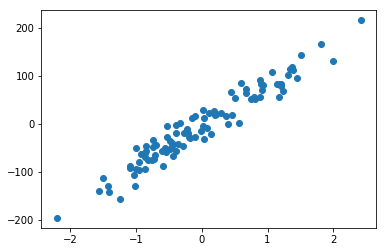

In [4]:
plt.plot(X,y, 'o');

For the purposes of drawing the regression line, lets create a uniform grid of points, and then reshape it into the canonical format

In [5]:
xgrid = np.linspace(-2.5,2.5,1000)
Xgrid = xgrid.reshape(-1,1)

## Fit using sklearn

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
lr = LinearRegression()
lr.fit(X,y)
ypgrid = lr.predict(Xgrid)
lr.coef_, lr.intercept_

(array([82.90456142]), -3.709228868670302)

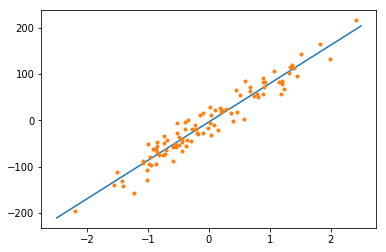

In [8]:
plt.plot(Xgrid, ypgrid)
plt.plot(X, y, '.')

In [9]:
from sklearn.metrics import r2_score

In [10]:
r2_score(y, lr.predict(X))

0.9342344891672815

## The impact of sample size

We'll sample 20 points from the data set. We do this by sampling 20 indices, index into X and y, and then fit on the sample

In [11]:
sample_indices = np.random.choice(range(100), size=20)
sample_indices

array([98, 29,  6, 62,  5, 22, 91, 89, 94, 70, 75, 54, 94, 27, 88, 22, 45,
       30, 19,  7])

In [12]:
Xsample = X[sample_indices]
ysample = y[sample_indices]

In [13]:
lr_s = LinearRegression().fit(Xsample, ysample)
r2_score(ysample, lr_s.predict(Xsample)), lr_s.score(Xsample, ysample)

(0.9421910899822037, 0.9421910899822037)

Lets check the sensitivity of our prediction to our sample. We'll do this 1000 times

(0.7, 1)

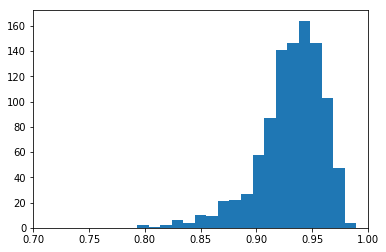

In [14]:
scores = []
for i in range(1000):
    sample_indices = np.random.choice(range(100), size=20)
    Xsample = X[sample_indices]
    ysample = y[sample_indices]
    scores.append(LinearRegression().fit(Xsample, ysample).score(Xsample, ysample))
plt.hist(scores,  bins=np.linspace(0.7, 1, 30))
plt.xlim(0.7,1)

Redo this with a higher amount of noise (about 400). For this you will need to create a new dataset. Plot the data. Plot the histogram of the R^2 as well as that of the coefficients.Try a smaller dataset as well. What conclusions can you draw?

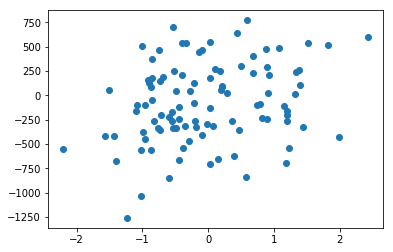

In [15]:
# your code here
Xnew, ynew, coefnew = make_regression(n_samples = 100, 
                       n_features=1, 
                       noise=400,
                       random_state=2017,
                       coef=True)
plt.plot(Xnew, ynew, 'o');

(0.7, 1)

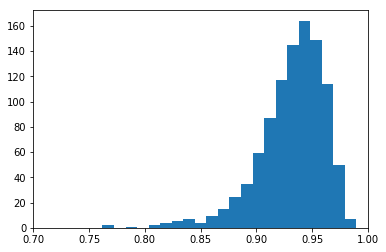

In [16]:
# your code here
scores = []
models = []
for i in range(1000):
    sample_indices = np.random.choice(range(100), size=20)
    Xsample = X[sample_indices]
    ysample = y[sample_indices]
    models.append(LinearRegression().fit(Xsample, ysample))
    scores.append(models[i].score(Xsample, ysample))
plt.hist(scores,  bins=np.linspace(0.7, 1, 30));
plt.xlim(0.7,1)

(0.7, 1)

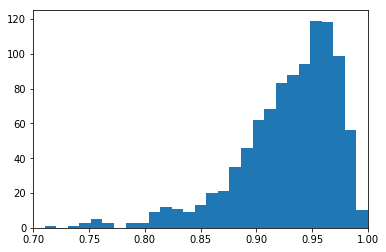

In [17]:
# your code here
scores = []
models = []
for i in range(1000):
    sample_indices = np.random.choice(range(100), size=10)
    Xsample = X[sample_indices]
    ysample = y[sample_indices]
    models.append(LinearRegression().fit(Xsample, ysample))
    scores.append(models[i].score(Xsample, ysample))
plt.hist(scores, bins=np.linspace(0.7, 1, 30));
plt.xlim(0.7,1)

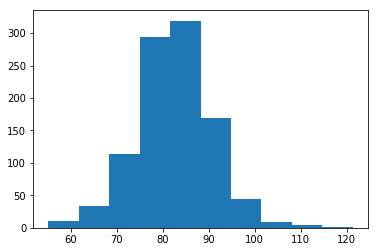

In [23]:
# your code here
plt.hist([models[i].coef_[0] for i in range(1000)], bins=10);

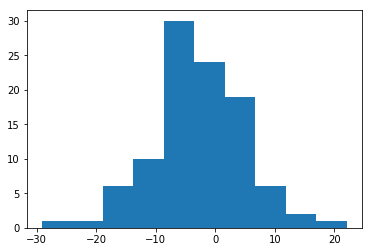

In [25]:
# your code here
plt.hist([models[i].intercept_ for i in range(100)], bins=10);

## Testing and training

A grid like the one we created might contain some of the points we fit this model on. This is called **Data Contamination** and is a big no-no. If we want an independent estimate of the error, we should hold out some points in a test set.

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=2017)

Now lets fit the model on the training set and evaluate it both on the training set and the test set. We print the R^2

In [31]:
lr2 = LinearRegression().fit(Xtrain, ytrain)
r2_test = r2_score(ytest, lr.predict(Xtest))
r2_train = r2_score(ytrain, lr.predict(Xtrain))

In [32]:
"Train R2 is {}, while test R^2 is {}".format(r2_train, r2_test)

'Train R2 is 0.9302930567263316, while test R^2 is 0.9446796445954511'

## Using Keras to fit the model

We'll use plain and simple gradient descent (why?) and Keras's Sequential API

In [67]:
from keras.models import Sequential
from keras.layers import Dense
lr3 = Sequential()
lr3.add(Dense(1, input_shape=(1,)))
lr3.compile(optimizer='sgd', loss='mean_squared_error',  metrics=['mae','accuracy'])
lr3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [68]:
history = lr3.fit(Xtrain, ytrain, epochs=400, batch_size=80)

Epoch 1/400
80/80 [==============================] - 1s 8ms/step - loss: 5361.4824 - mean_absolute_error: 59.8523 - acc: 0.0000e+00
Epoch 2/400
80/80 [==============================] - 0s 24us/step - loss: 5216.2017 - mean_absolute_error: 59.0328 - acc: 0.0000e+00
Epoch 3/400
80/80 [==============================] - 0s 24us/step - loss: 5075.1665 - mean_absolute_error: 58.2255 - acc: 0.0000e+00
Epoch 4/400
80/80 [==============================] - 0s 23us/step - loss: 4938.2520 - mean_absolute_error: 57.4300 - acc: 0.0000e+00
Epoch 5/400
80/80 [==============================] - 0s 31us/step - loss: 4805.3369 - mean_absolute_error: 56.6463 - acc: 0.0000e+00
Epoch 6/400
80/80 [==============================] - 0s 22us/step - loss: 4676.3037 - mean_absolute_error: 55.8877 - acc: 0.0000e+00
Epoch 7/400
80/80 [==============================] - 0s 20us/step - loss: 4551.0400 - mean_absolute_error: 55.1432 - acc: 0.0000e+00
Epoch 8/400
80/80 [==============================] - 0s 21us/step - lo

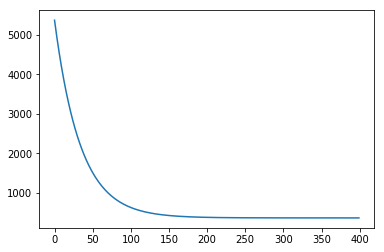

In [69]:
plt.plot(history.history['loss'])

In [70]:
lr3.get_weights()

[array([[82.38442]], dtype=float32), array([-3.3930035], dtype=float32)]

### Using the Keras Functional API



In [71]:
from keras.layers import Input, Dense
from keras.models import Model

inputs_placeholder = Input(shape=(1,))
outputs_placeholder = Dense(1, activation='linear')(inputs_placeholder)

m = Model(inputs=inputs_placeholder, outputs=outputs_placeholder)
m.compile(optimizer='sgd', loss='mean_squared_error',  metrics=['mae','accuracy'])
m.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 1)                 0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [72]:
history2 = m.fit(Xtrain, ytrain, epochs=250, batch_size=80)

Epoch 1/250
80/80 [==============================] - 0s 6ms/step - loss: 5279.3291 - mean_absolute_error: 59.3928 - acc: 0.0000e+00
Epoch 2/250
80/80 [==============================] - 0s 22us/step - loss: 5136.4331 - mean_absolute_error: 58.5800 - acc: 0.0000e+00
Epoch 3/250
80/80 [==============================] - 0s 21us/step - loss: 4997.7144 - mean_absolute_error: 57.7793 - acc: 0.0000e+00
Epoch 4/250
80/80 [==============================] - 0s 26us/step - loss: 4863.0483 - mean_absolute_error: 56.9904 - acc: 0.0000e+00
Epoch 5/250
80/80 [==============================] - 0s 26us/step - loss: 4732.3164 - mean_absolute_error: 56.2221 - acc: 0.0000e+00
Epoch 6/250
80/80 [==============================] - 0s 26us/step - loss: 4605.4038 - mean_absolute_error: 55.4700 - acc: 0.0000e+00
Epoch 7/250
80/80 [==============================] - 0s 25us/step - loss: 4482.1968 - mean_absolute_error: 54.7378 - acc: 0.0000e+00
Epoch 8/250
80/80 [==============================] - 0s 22us/step - lo

In [73]:
m.get_weights()

[array([[80.528725]], dtype=float32), array([-3.5062547], dtype=float32)]